**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv ("/content/Shopping Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Univariate analysis**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


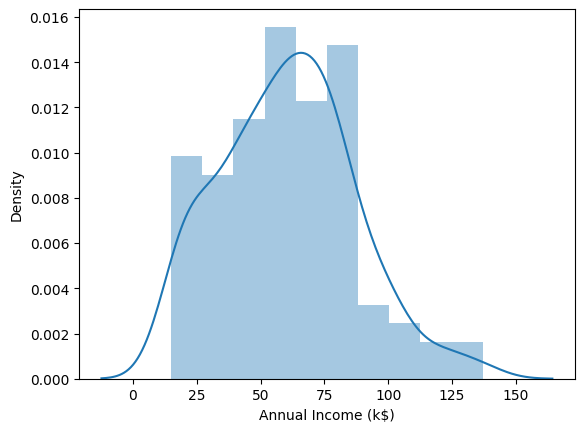

In [ ]:
sns.distplot(df['Annual Income (k$)']);

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

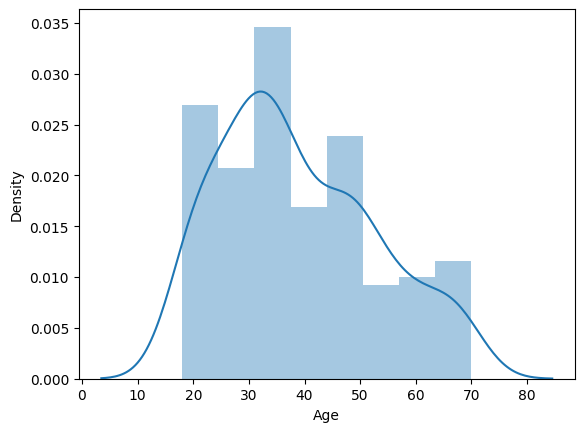

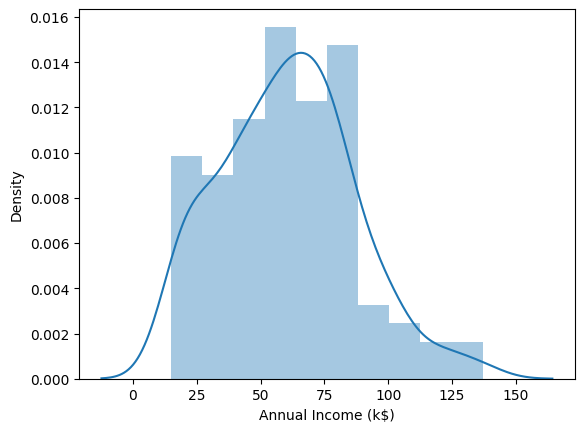

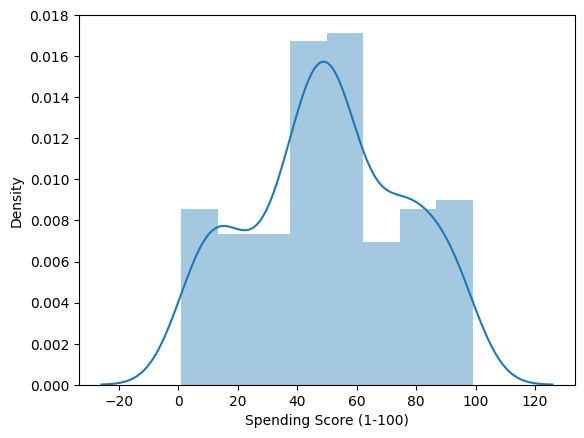

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

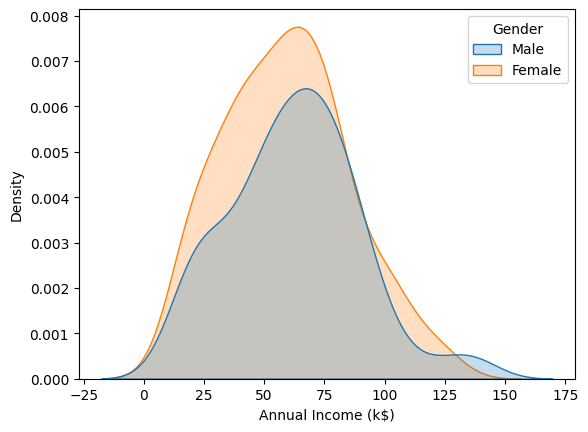

In [ ]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender');

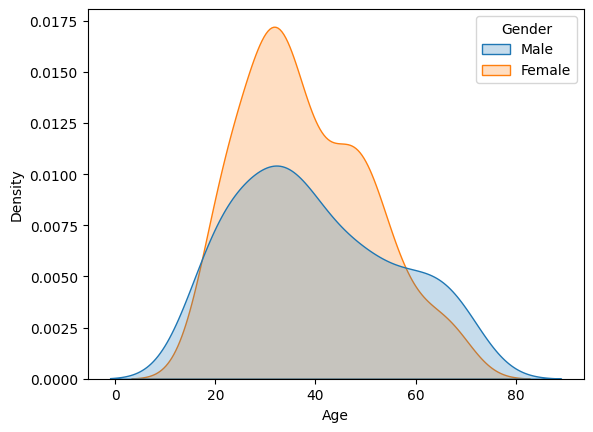

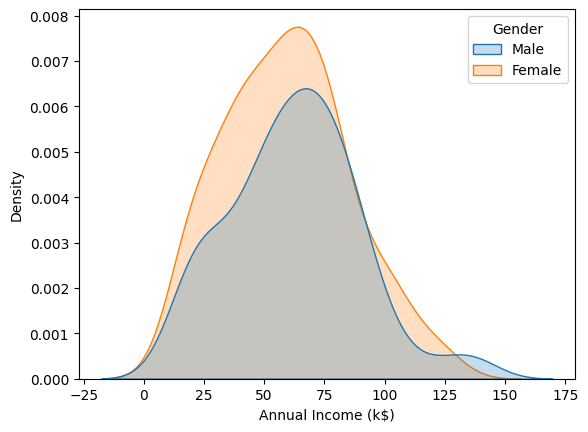

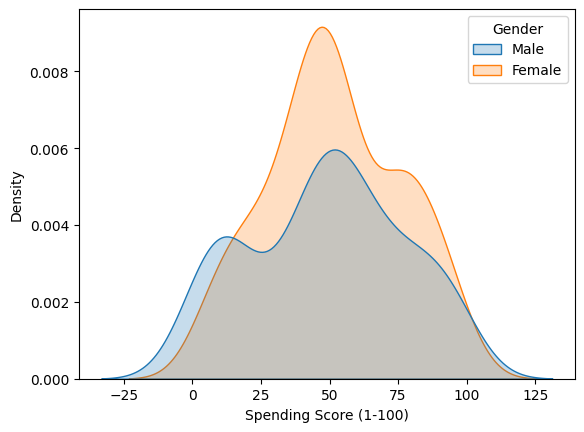

In [45]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')

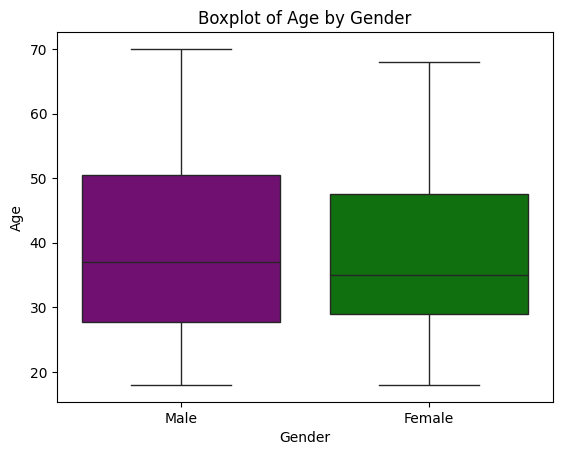

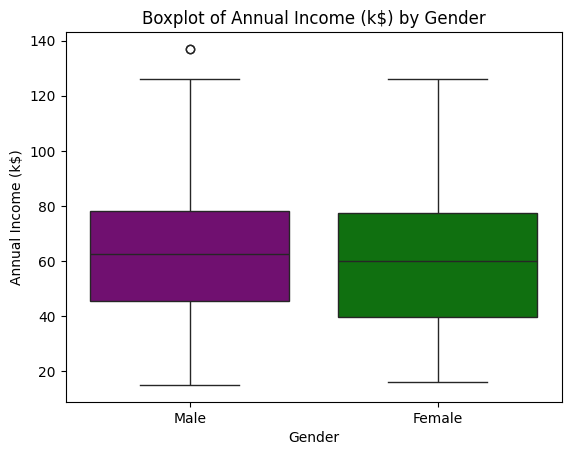

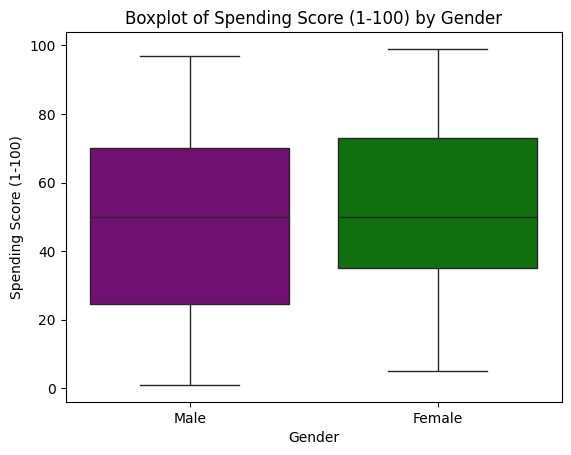

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i, palette={'Male': 'purple', 'Female': 'green'})
    plt.title(f'Boxplot of {i} by Gender')
    plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


**Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

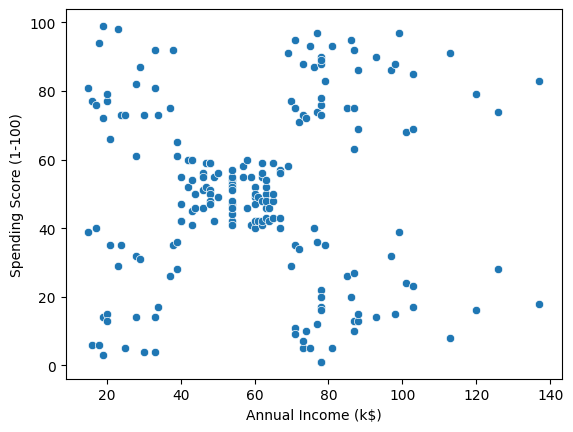

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

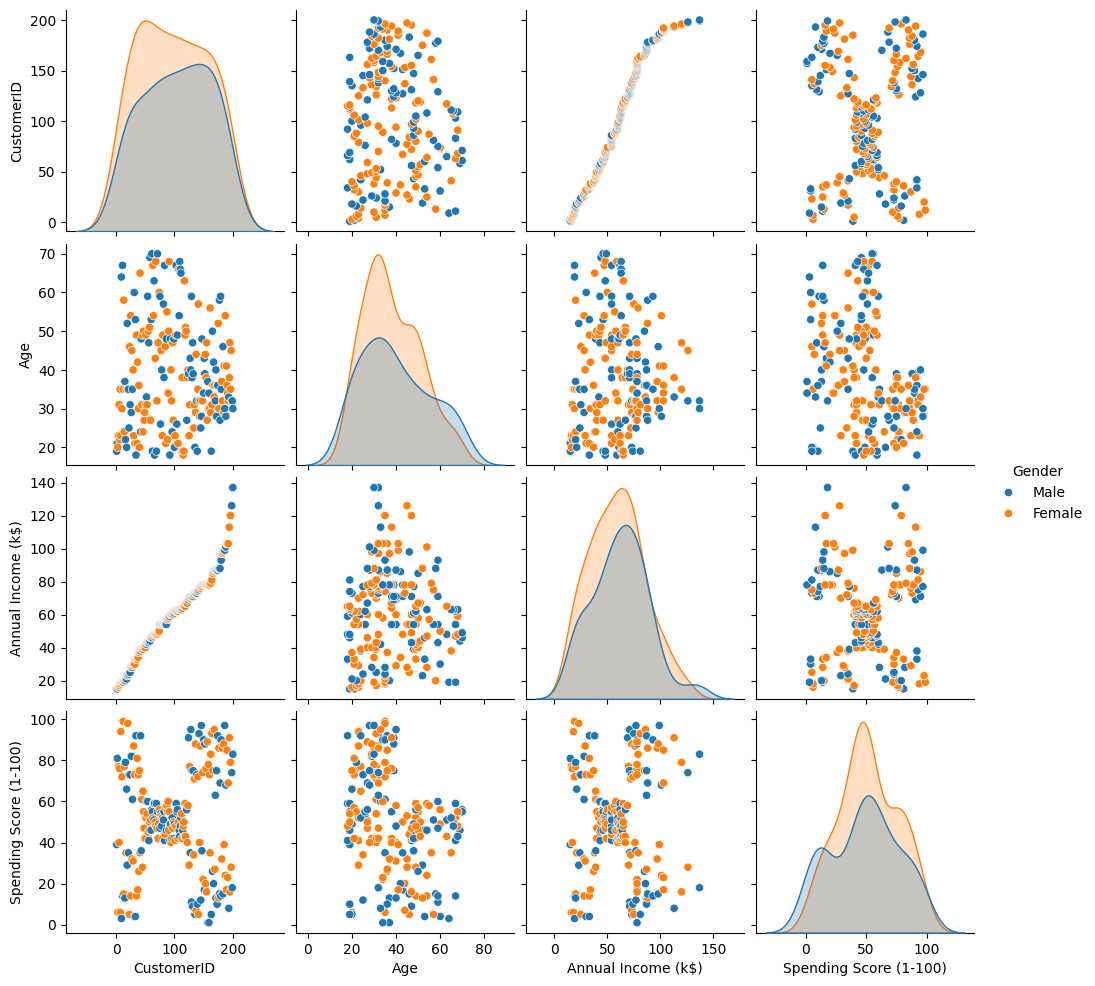

In [ ]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [ ]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
correlation_matrix = df.select_dtypes(include='number').corr()
print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<Axes: >

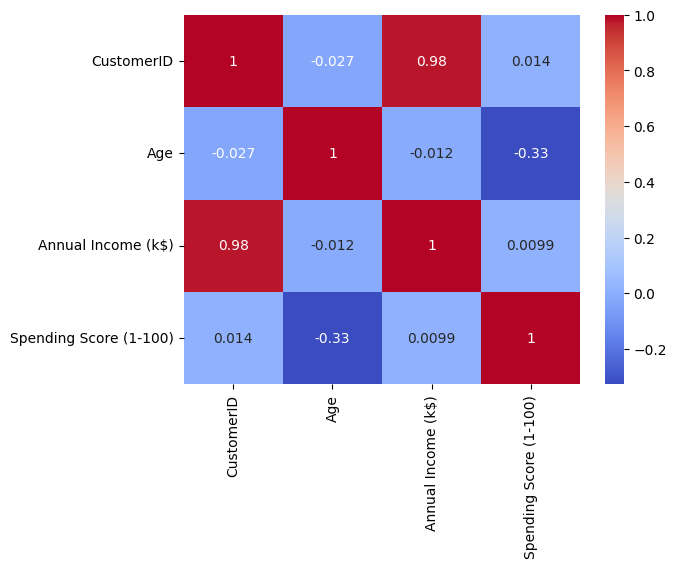

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

**Univariate, Bivariate and Multivariate Clustering**

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
2,90
0,74
1,36


In [ ]:
clustering1.inertia_

23517.33093093092

In [ ]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [ ]:
intertia_scores

[137277.2800000002,
 48660.88888888887,
 25640.457784396807,
 17410.741031941037,
 9121.14285714286,
 5728.855832763724,
 4168.1973555430095,
 2857.4416971916967,
 2396.4671717171727,
 1898.3216089466082]

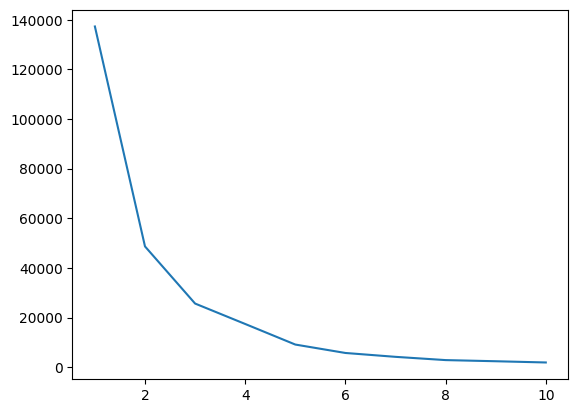

In [ ]:
plt.plot(range(1,11),intertia_scores)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [ ]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


**Bivariate Clustering**

In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


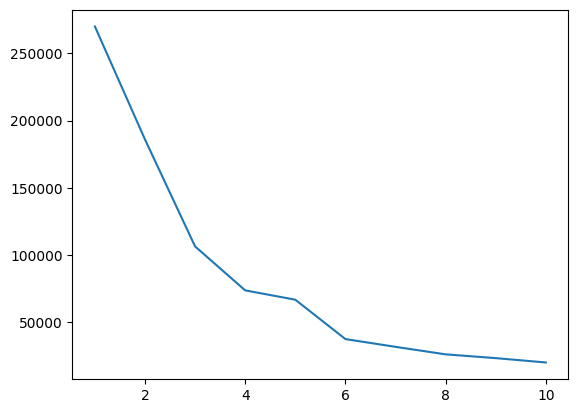

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

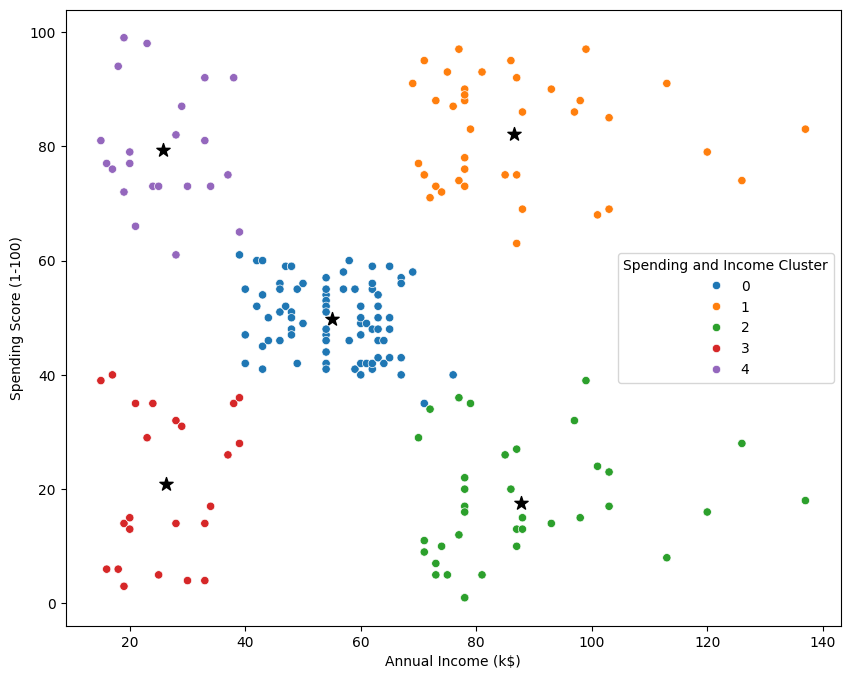

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.538462,0.461538
2,0.472222,0.527778
3,0.608696,0.391304
4,0.590909,0.409091


In [ ]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


**Multivariate Clustering**

In [ ]:
scale = StandardScaler

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3


In [ ]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,3,True
1,2,21,15,81,0,4,True
2,3,20,16,6,0,3,False
3,4,23,16,77,0,4,False
4,5,31,17,40,0,3,False


In [ ]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [ ]:
scaler = StandardScaler()
dff_scaled = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns, index=dff.index)
print(dff_scaled.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801     1.128152
1 -1.281035           -1.738999                1.195704     1.128152
2 -1.352802           -1.700830               -1.715913    -0.886405
3 -1.137502           -1.700830                1.040418    -0.886405
4 -0.563369           -1.662660               -0.395980    -0.886405


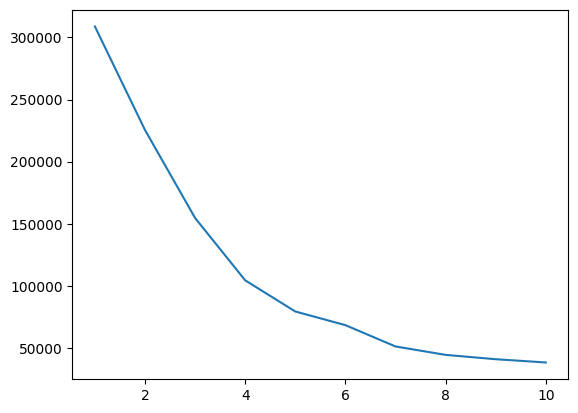

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,2
